# Cohort Analysis on (1) Unique Cusromers and (2) Total Purchase Price

In [1]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

df = pd.read_excel('Когортный анализ.xlsx')

# Checking dataframe for null-values
df.isna().value_counts()

# Function for creating new feature 'cohort_Month' to identify month of the order
def get_month(df):
    return dt.datetime(df.year, df.month, 1)
df['month_year'] = df.date.apply(get_month)
df['cohortMonth'] = df.groupby('user_id')['month_year'].transform('min')


In [2]:
# Function for extraction month and year separately for creating 'cohort_index'
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

date_year, date_month = get_date(df, 'date')
cohort_year, cohort_month = get_date(df, 'cohortMonth')
year_diff = date_year - cohort_year
month_diff = date_month - cohort_month
df['cohort_index'] = year_diff * 12 + month_diff + 1

In [3]:
# Creating of Pivot Table for Cohort Analysis on (1) Unique Customers
unique_customers = df.pivot_table(index = 'cohortMonth', columns = 'cohort_index', values = 'user_id', aggfunc = 'nunique')
unique_customers

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1210.0,455.0,264.0,247.0,242.0,207.0,185.0,172.0,165.0,171.0,164.0,159.0,162.0,149.0
2020-02-01,1111.0,440.0,222.0,202.0,201.0,171.0,133.0,123.0,113.0,90.0,94.0,76.0,62.0,NaN
2020-03-01,1545.0,527.0,306.0,290.0,286.0,250.0,223.0,208.0,186.0,187.0,182.0,175.0,NaN,NaN
2020-04-01,1333.0,515.0,238.0,219.0,228.0,186.0,144.0,143.0,136.0,125.0,111.0,NaN,NaN,NaN
2020-05-01,1738.0,581.0,313.0,301.0,302.0,260.0,240.0,235.0,219.0,206.0,NaN,NaN,NaN,NaN
2020-06-01,1480.0,558.0,265.0,247.0,249.0,216.0,186.0,174.0,153.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,1995.0,649.0,332.0,312.0,293.0,256.0,243.0,224.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1744.0,643.0,285.0,265.0,263.0,227.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,2081.0,701.0,336.0,312.0,303.0,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Converting the table to a percentage form
first_col = unique_customers.iloc[:, 0]
retention = unique_customers.div(first_col, axis = 0)
retention.round(2)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1.0,0.38,0.22,0.20,0.20,0.17,0.15,0.14,0.14,0.14,0.14,0.13,0.13,0.12
2020-02-01,1.0,0.40,0.20,0.18,0.18,0.15,0.12,0.11,0.10,0.08,0.08,0.07,0.06,NaN
2020-03-01,1.0,0.34,0.20,0.19,0.19,0.16,0.14,0.13,0.12,0.12,0.12,0.11,NaN,NaN
2020-04-01,1.0,0.39,0.18,0.16,0.17,0.14,0.11,0.11,0.10,0.09,0.08,NaN,NaN,NaN
2020-05-01,1.0,0.33,0.18,0.17,0.17,0.15,0.14,0.14,0.13,0.12,NaN,NaN,NaN,NaN
2020-06-01,1.0,0.38,0.18,0.17,0.17,0.15,0.13,0.12,0.10,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.33,0.17,0.16,0.15,0.13,0.12,0.11,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.37,0.16,0.15,0.15,0.13,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.34,0.16,0.15,0.15,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


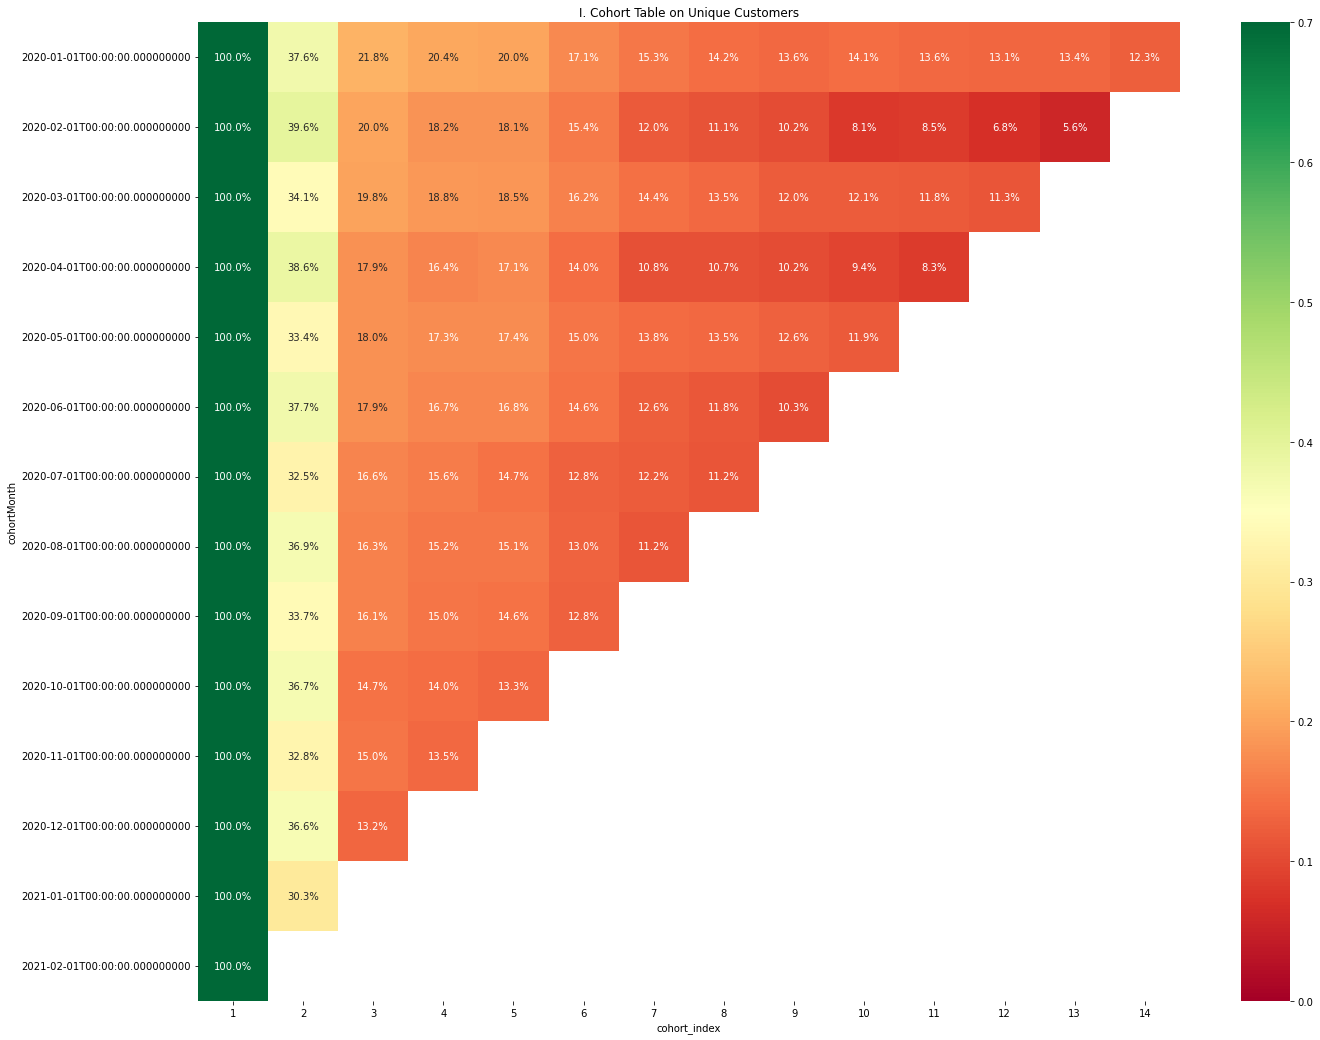

In [5]:
# Cohort Table on Unique Customers
plt.figure(figsize=(22,18))
sns.heatmap(data = retention, annot = True, fmt = '.1%', vmin = 0.0, vmax = 0.7, cmap = 'RdYlGn')
plt.title('I. Cohort Table on Unique Customers')
plt.show()

In [6]:
# Creating of Pivot Table for Cohort Analysis on (2) Total Purchase Price
df_cohort_sum = df.pivot_table(index = 'cohortMonth', columns = 'cohort_index', values = 'price', aggfunc = sum)
df_cohort_sum

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,662180.0,642990.0,608410.0,565650.0,547080.0,483840.0,455490.0,412040.0,407790.0,428040.0,382000.0,371740.0,360570.0,79310.0
2020-02-01,536310.0,594210.0,445590.0,450500.0,409640.0,366150.0,300350.0,278920.0,251840.0,212570.0,194800.0,156240.0,31080.0,NaN
2020-03-01,873000.0,797300.0,680220.0,666890.0,646610.0,546210.0,542030.0,486430.0,461720.0,465630.0,447040.0,90390.0,NaN,NaN
2020-04-01,648770.0,667480.0,526090.0,503450.0,482350.0,378620.0,354250.0,332740.0,329710.0,314460.0,61750.0,NaN,NaN,NaN
2020-05-01,992030.0,870090.0,737430.0,740850.0,699940.0,633220.0,584100.0,572410.0,568870.0,115380.0,NaN,NaN,NaN,NaN
2020-06-01,718980.0,759810.0,563430.0,559150.0,545300.0,472750.0,453890.0,411240.0,78310.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,1106840.0,913300.0,739440.0,735260.0,661290.0,634590.0,604380.0,124890.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,844520.0,800350.0,607090.0,586730.0,603010.0,517030.0,94600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1164460.0,979070.0,784700.0,778600.0,710410.0,140880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Converting the table to a percentage form
first_col = df_cohort_sum.iloc[:, 0]
retention = df_cohort_sum.div(first_col, axis = 0)
retention.round(2)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1.0,0.97,0.92,0.85,0.83,0.73,0.69,0.62,0.62,0.65,0.58,0.56,0.54,0.12
2020-02-01,1.0,1.11,0.83,0.84,0.76,0.68,0.56,0.52,0.47,0.40,0.36,0.29,0.06,NaN
2020-03-01,1.0,0.91,0.78,0.76,0.74,0.63,0.62,0.56,0.53,0.53,0.51,0.10,NaN,NaN
2020-04-01,1.0,1.03,0.81,0.78,0.74,0.58,0.55,0.51,0.51,0.48,0.10,NaN,NaN,NaN
2020-05-01,1.0,0.88,0.74,0.75,0.71,0.64,0.59,0.58,0.57,0.12,NaN,NaN,NaN,NaN
2020-06-01,1.0,1.06,0.78,0.78,0.76,0.66,0.63,0.57,0.11,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.83,0.67,0.66,0.60,0.57,0.55,0.11,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.95,0.72,0.69,0.71,0.61,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.84,0.67,0.67,0.61,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


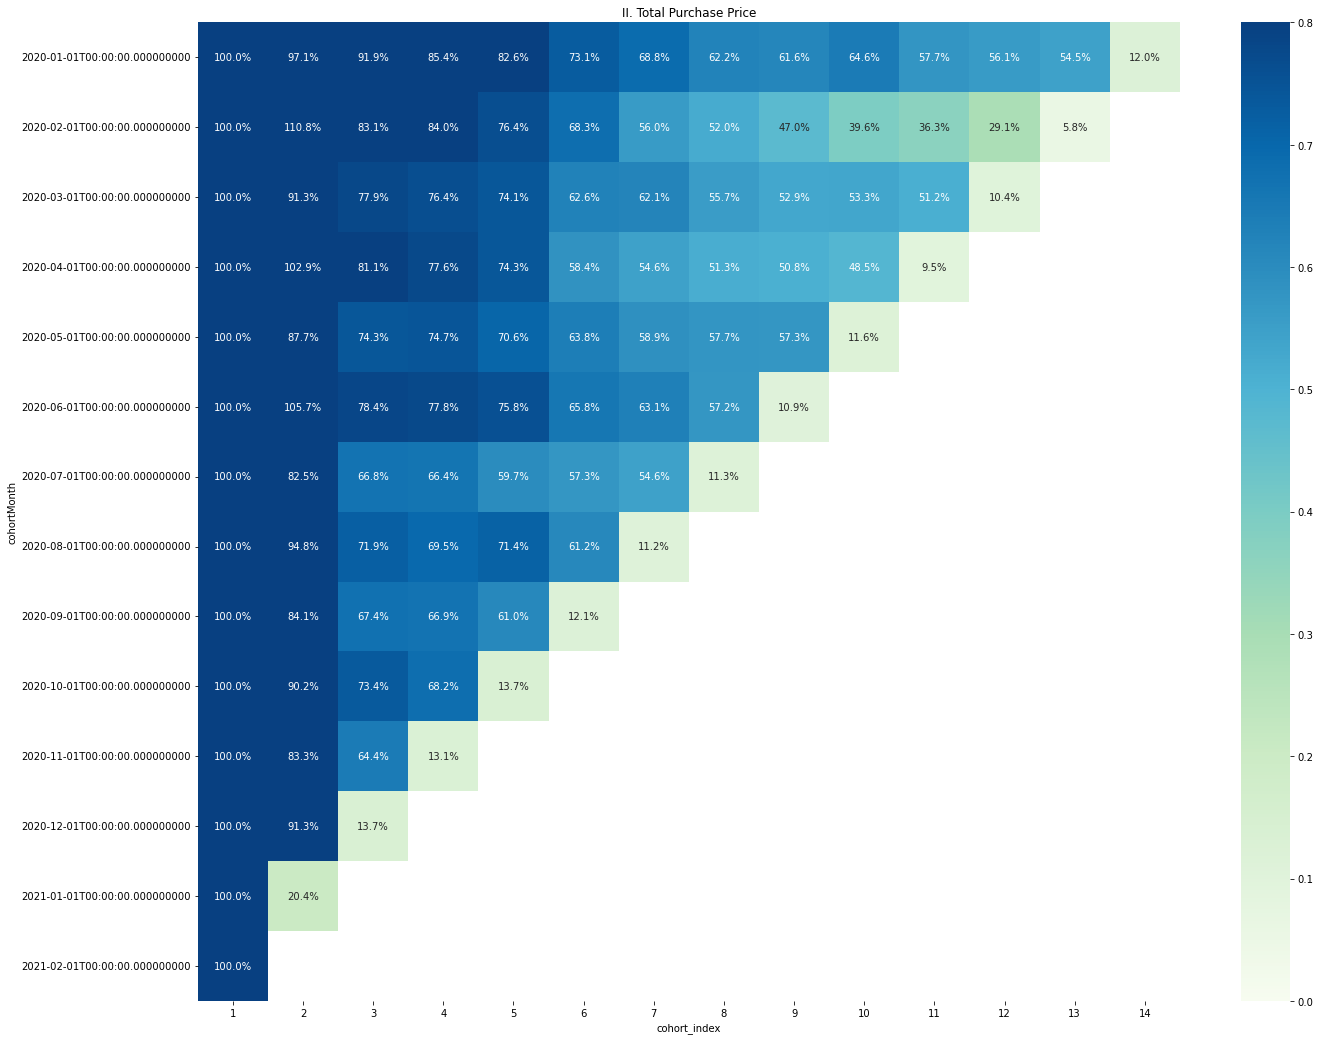

In [15]:
# Cohort Table on Total Purchase Price
plt.figure(figsize = (22,18))
sns.heatmap(data = retention, annot = True, fmt = '0.1%', vmin = 0.0, vmax = 0.8, cmap='GnBu')
plt.title('II. Total Purchase Price')
plt.show()